In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from sklearn.metrics import accuracy_score
import random
import matplotlib.pyplot as plt


In [2]:
# Load the MNIST dataset
def load_data():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    # Normalize data to the [0, 1] range
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0
    x_train = np.expand_dims(x_train, -1)
    x_test = np.expand_dims(x_test, -1)
    return (x_train, y_train), (x_test, y_test)

In [3]:
# Build a CNN model
def build_model(num_layers):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    for _ in range(num_layers):  # Add additional convolutional layers based on ACO
        model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))  # Add padding='same'
        model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))  # 10 classes for MNIST digits
    return model

In [4]:
# Ant Colony Optimization Algorithm (simplified version)
class ACO:
    def __init__(self, num_ants, num_iterations, num_layers_options, batch_size=64):
        self.num_ants = num_ants
        self.num_iterations = num_iterations
        self.num_layers_options = num_layers_options
        self.batch_size = batch_size
        self.best_solution = None
        self.best_score = 0
        self.accuracy_history = []

        # Load data only once
        self.x_train, self.y_train = load_data()[0]
        self.x_test, self.y_test = load_data()[1]

    def visualize_results(self):
        # Convert accuracy history to a numpy array for easier manipulation
        accuracy_array = np.array(self.accuracy_history)

        # Plot the accuracies of each ant for every iteration
        plt.figure(figsize=(12, 6))
        for ant in range(self.num_ants):
            plt.plot(range(1, self.num_iterations + 1), accuracy_array[:, ant], label=f'Ant {ant + 1}')
        plt.title('Accuracy of Each Ant Over Iterations')
        plt.xlabel('Iteration')
        plt.ylabel('Accuracy')
        plt.xticks(range(1, self.num_iterations + 1))
        plt.ylim(0, 1)
        plt.legend()
        plt.grid()
        plt.show()

        # Plot the overall best score per iteration
        best_scores = np.max(accuracy_array, axis=1)
        plt.figure(figsize=(12, 6))
        plt.plot(range(1, self.num_iterations + 1), best_scores, marker='o', color='blue')
        plt.title('Best Accuracy Over Iterations')
        plt.xlabel('Iteration')
        plt.ylabel('Best Accuracy')
        plt.xticks(range(1, self.num_iterations + 1))
        plt.ylim(0, 1)
        plt.grid()
        plt.show()

    def run(self):
        for iteration in range(self.num_iterations):
            print(f'Iteration {iteration + 1}/{self.num_iterations}')
            iteration_accuracies = []
            for ant in range(self.num_ants):
                # Randomly choose a number of layers
                num_layers = random.choice(self.num_layers_options)
                model = build_model(num_layers)
                model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
                
                # Train the model in batches
                model.fit(self.x_train, self.y_train, epochs=1, batch_size=self.batch_size, verbose=0)
                
                # Evaluate model
                y_pred = np.argmax(model.predict(self.x_test), axis=1)

                # Calculate accuracy
                score = accuracy_score(self.y_test, y_pred)
                iteration_accuracies.append(score)
                print(f'Ant {ant + 1}, Layers: {num_layers}, Accuracy: {score:.4f}')

                # Update the best solution found so far
                if score > self.best_score:
                    self.best_score = score
                    self.best_solution = num_layers

            self.accuracy_history.append(iteration_accuracies)

        print(f'Best Solution: {self.best_solution} layers with accuracy: {self.best_score:.4f}')
        self.visualize_results()


Iteration 1/10
313/313 [==============================] - 4s 12ms/step
Ant 1, Layers: 4, Accuracy: 0.9721
313/313 [==============================] - 4s 13ms/step
Ant 2, Layers: 4, Accuracy: 0.9834
313/313 [==============================] - 4s 12ms/step
Ant 3, Layers: 2, Accuracy: 0.9864
313/313 [==============================] - 3s 10ms/step
Ant 4, Layers: 2, Accuracy: 0.9853
313/313 [==============================] - 4s 12ms/step
Ant 5, Layers: 3, Accuracy: 0.9866
Iteration 2/10
313/313 [==============================] - 4s 11ms/step
Ant 1, Layers: 2, Accuracy: 0.9848
313/313 [==============================] - 3s 10ms/step
Ant 2, Layers: 2, Accuracy: 0.9817
313/313 [==============================] - 3s 10ms/step
Ant 3, Layers: 2, Accuracy: 0.9863
313/313 [==============================] - 3s 9ms/step
Ant 4, Layers: 1, Accuracy: 0.9866
313/313 [==============================] - 3s 10ms/step
Ant 5, Layers: 2, Accuracy: 0.9853
Iteration 3/10
313/313 [==============================] - 4s 

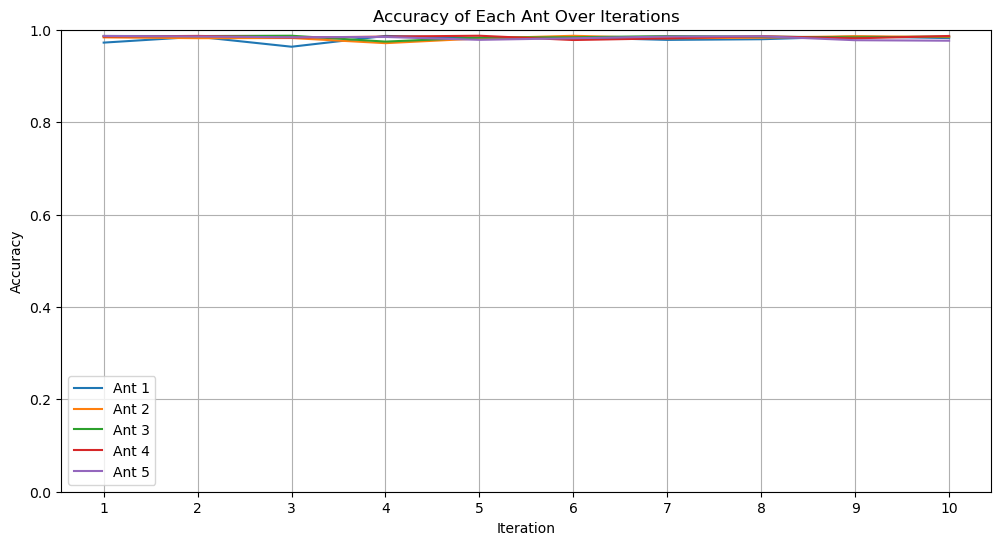

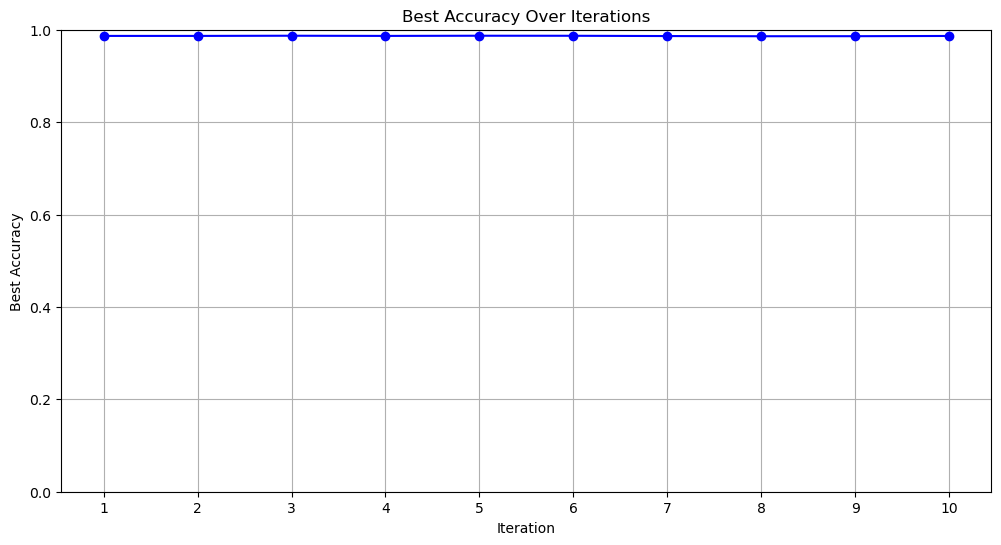

In [5]:
# Main script execution
if __name__ == '__main__':
    num_layers_options = [1, 2, 3, 4]  # Possible number of layers for exploration
    aco = ACO(num_ants=5, num_iterations=10, num_layers_options=num_layers_options)
    aco.run()


# Best Solution: 3 layers with accuracy: 0.9870